<a href="https://colab.research.google.com/github/kundana12345/DataScience/blob/main/KundAddaU2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unit 2 Project: Alopecia and diabetes, is there a correlation?

**Task**:

Two parts:

1. Propose a data set that's compatible with a pymc betabinomial model. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a betabinomial model using pymc within the colab environment, on a data set of your choice.

Dataset
https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset

Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Anything that can be looked at as either being yes or no, success or faliure, can be modeled with the betabinomial model. Examples: BAP3 introduces the betabinomial model with coin flipping, and Richard McElreath starts with guessing the proportion of surface water covering a planet in his book Statistical Rethinking.

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

-  Use your best idea now; you could use the same context the whole course and learn everything you need to know. Its more than ok to use the same context, or even some of the same data, from unit to unit.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The Unit2NotesAK *is* your example! You are expected to be somewhere between a half and a quarter as detailed--but more is always welcome.

**Context:**
The purpose of this project is to see whether having alopecia (hair loss) is associated with having diabetes. The data comes from the Early Stage Diabetes Risk Prediction Dataset from UCI Machine Learning Repository which has features for a total of 520 patients, some with and some without diabetes. It also contained 16 associated features such as age, muscle stiffness, and alopecia. For this project, the data was limited to 242 patients, because these are the ones who were positive for diabetes. Within these 242 patients, some had alopecia, and some didn't.



*   You can read more about alopecia here: https://my.clevelandclinic.org/health/diseases/12423-alopecia-areata
*   You can read more about diabetes here: https://www.mayoclinic.org/diseases-conditions/diabetes/symptoms-causes/syc-20371444



Dataset: https://www.google.com/url?q=https%3A%2F%2Farchive.ics.uci.edu%2Fdataset%2F529%2Fearly%2Bstage%2Bdiabetes%2Brisk%2Bprediction%2Bdataset

This is a binomial problem because it represents the probability that a diabetes patient has alopecia.


In [1]:
!pip install preliz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 7.3 MB/s eta 0:00:00


In [2]:
import preliz as pz

In [3]:
import numpy as np
import arviz as az
import pymc as pm

**Prior:** The prior distribution shows our intial belief about the proportion of diabetes patients who also have alopecia. I put lower numbers so that this is weighed less in the posterior compared to the actual data we have. I saw past research of a positive correlation between the two. Linked below:

*   https://pubmed.ncbi.nlm.nih.gov/39852208/
*   https://pmc.ncbi.nlm.nih.gov/articles/PMC6831789/
*   https://www.mdpi.com/2075-4426/15/1/16

Based on this research, the model assumes there are around 6 positive alopecia cases for every 10 diabetes cases. That is why:


*   $α = 6$
*   $β = 4$ --> this represents there being 4 negative alopecia cases for every 10 diabetes cases



In [4]:
prior = pz.Beta(alpha=6,beta=4)

prior.mean(), prior.median(), prior.mode()

(np.float64(0.6), 0.6069151671894176, np.float64(0.625))

The mean shows the average of all prior distributions, the median is the middle and the mode is the most present precentage.

**Data:**
This was the data used: https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset

After filtering out the non-diabetic patients, there were 320 diabetic patients left.


*   Diabetes patients with alopecia: 78
*   Total diabetes patients: 320



**Posterior**

In [5]:
#prior information
alpha_old = 6
beta_old = 4

#likelihood info
k = 78 #diabetes and alopecia
n = 320 #total diabetes (with and without alopecia)

analytic_FT = pz.Beta(alpha = alpha_old + k,beta = beta_old + n - k )

analytic_FT.mean()


np.float64(0.2545454545454545)

<Axes: >

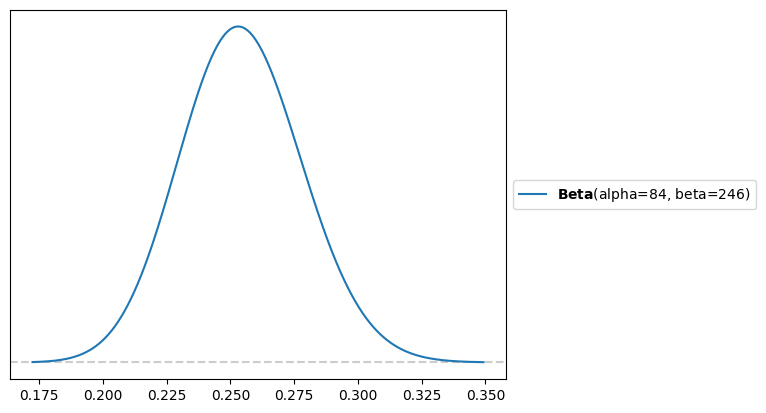

In [6]:
analytic_FT.plot_pdf()

This is the result of combining the prior and the likelihood. The 25.46% shows the updated probability after factoring in both.

In [7]:
import pymc as pm

In [8]:
#the positive cases of alopecia
D_positive = np.repeat(1, 78)

#the negative cases of alopecia
D_negative = np.repeat(0, 242)

#combine positive and negative cases into an array
D_data = np.concatenate( [D_positive,D_negative] )

In [10]:
with pm.Model() as D_model:
  #from the prior
  θ = pm.Beta('θ' , alpha = 3. , beta = 7.)

  #from the dataset
  y = pm.Bernoulli('y', p = θ, observed = D_data)

  idata_FT = pm.sample(progressBar=False)
  #had to make it false so I can upload to GitHub

Output()

In [9]:
az.plot_posterior(idata_FT)

NameError: name 'idata_FT' is not defined

Analysis: This shows that there is a 94% chance that the probability of having alopecia when you have diabetes is between 20% and 29%.

In [ ]:
pm.sample_posterior_predictive(idata_FT, model=D_model, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

In [10]:
import arviz as az

In [11]:
stacked_FT = az.extract(idata_FT, group="posterior_predictive")

ValueError: Can not extract posterior_predictive from Inference data with groups:
	> posterior
	> sample_stats
	> observed_data! See /usr/local/lib/python3.12/dist-packages/arviz/data/converters.py for other conversion utilities.

In [ ]:
stacked_FT.sel(sample=0).sel(draw=0).y.to_series().values

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

These are predictions for the next diabetes patients based on our model. 1 means they have alopecia, and 0 means they don't.

**Conclusion**


*   The posterior mean prediction was 25.46%. This means that around one fourth of diabetes patients have alopecia. This is lower than the correlation than I previously thought it was. This can mean that there is a chance that you have alopecia if you have diabetes, but we don't know for sure that the reason that those who had alopecia was because they had diabetes, our model doesn't tell us that. In order to figure that out, looking at all the positive alopecia cases and then seeing if they had diabetes or no diabetes might have helped.
*   Since the mean posterior value (25.46%) was lower than the prior value (60%), that means that the data made the alopecia rate lower.

*   There is a 94% chance that the chance of having alopecia when you have diabetes it between 20% and 29%.

Some ideas for future improved models:


*   A dataset that gives the value of how severe the alopecia is.
*   Looking into the specific cause of alopecia.


*   Making use of the other 15 features that were given into this dataset such as age, gender, weakness, itching, etc. and making a model that looks into all of these correlations and sees which one has the highest. This would be helpful for diabetes screeing in the "real world".




